# Phân tích chỉ số chất lượng không khí (Air Quality Index) của USA

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-2.png)

**Dataset Source:**  https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates  

**Chú thích các đặc trưng trong tập dữ liệu:**   
- **City**: thành phố  
- **AQI**: chỉ số chất lượng không khí  
- **CO**: Carbon Monoxide (chất gây độc cho hệ hô hấp)  
- **PM2.5**: Chỉ số để chỉ các hạt hoặc giọt nhỏ trong không khí có chiều rộng từ 2.5 $\mu$ m trở xuống

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-3.png)

# 1. Khai báo thư viện

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# 2. Xử lý dữ liệu

#### 2.1. Đọc dữ liệu

In [28]:
df = pd.read_csv("D:/DATA ANALYST/Mind X/III. Data Analysis/Project/Data.csv")

In [29]:
df.dropna(inplace=True)

In [30]:
location_col = ['Country']
coordination_col = ['lat', 'lng']
categorical_col = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
numerical_col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# 3. Phân tích khai phá dữ liệu (EDA)

## 3.1. Dữ liệu phân tích là số (numerical)

In [31]:
a = len(df['Country'].unique())
print(f'Thực hiện khảo sát không khí trên {a} quốc gia')

Thực hiện khảo sát không khí trên 174 quốc gia


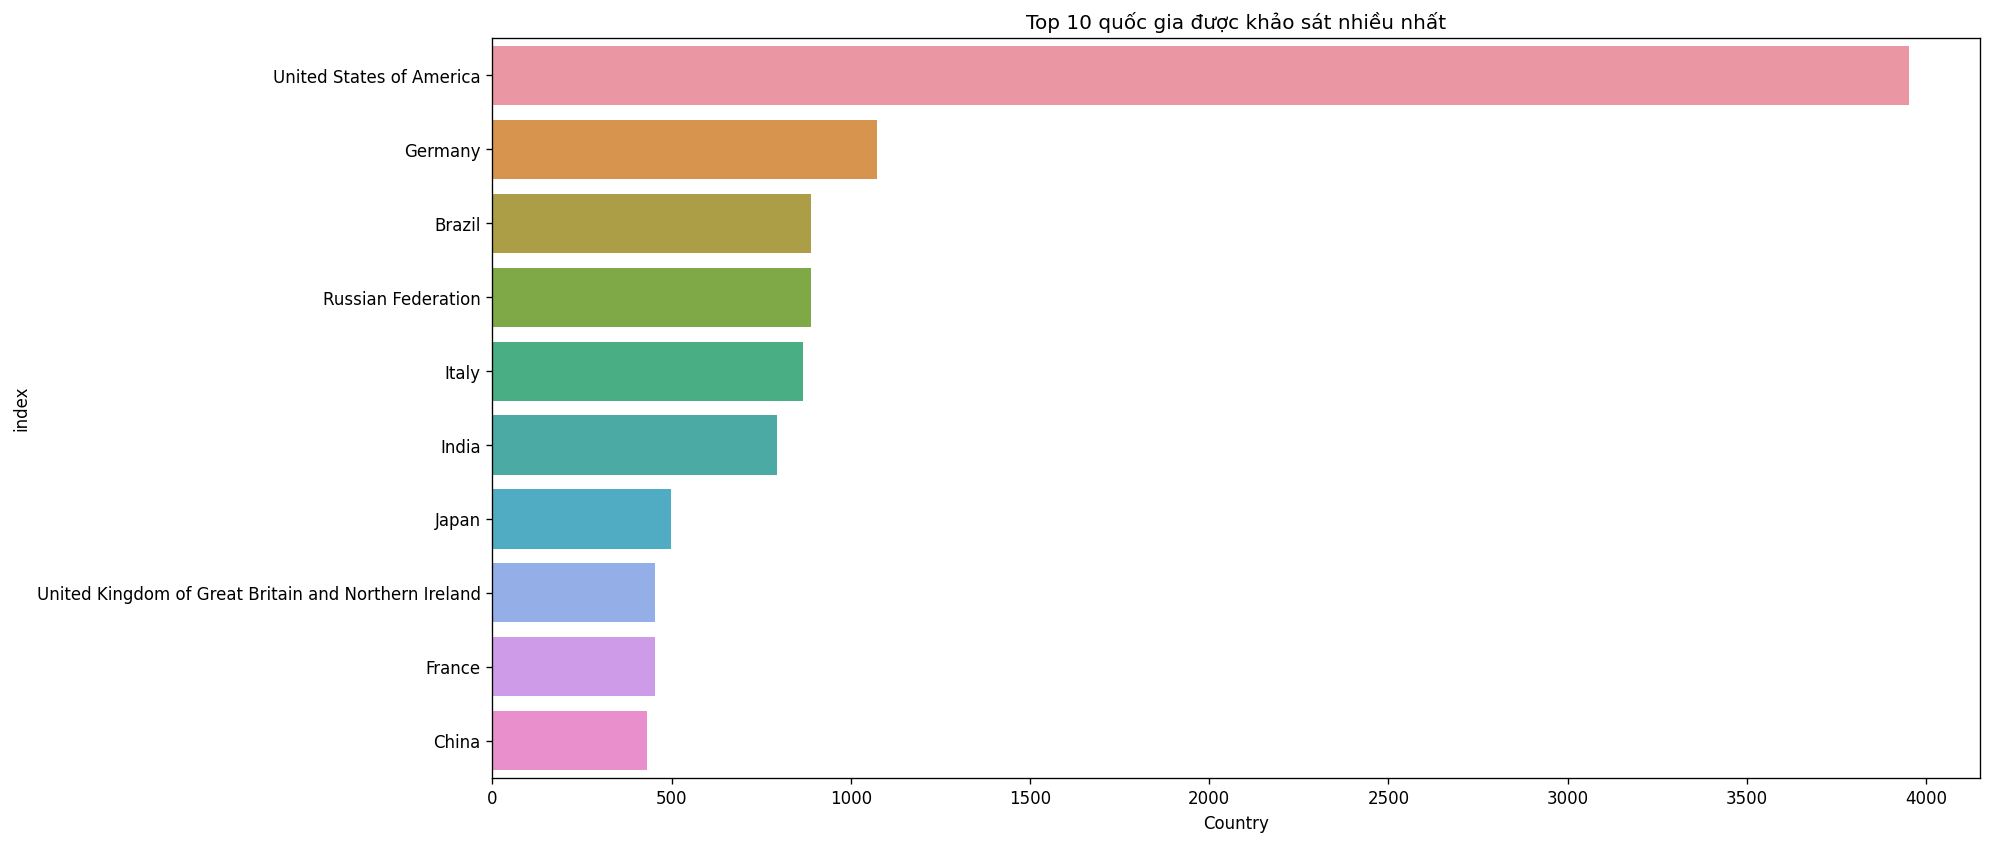

In [32]:
# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))
top_cities = df['Country'].value_counts().sort_values(ascending=False)[:10].reset_index()
sns.barplot(data=top_cities, y='index', x='Country')  # 'City' represents the count column
plt.title('Top 10 quốc gia được khảo sát nhiều nhất')
plt.show()

Text(0, 0.5, 'Latitude')

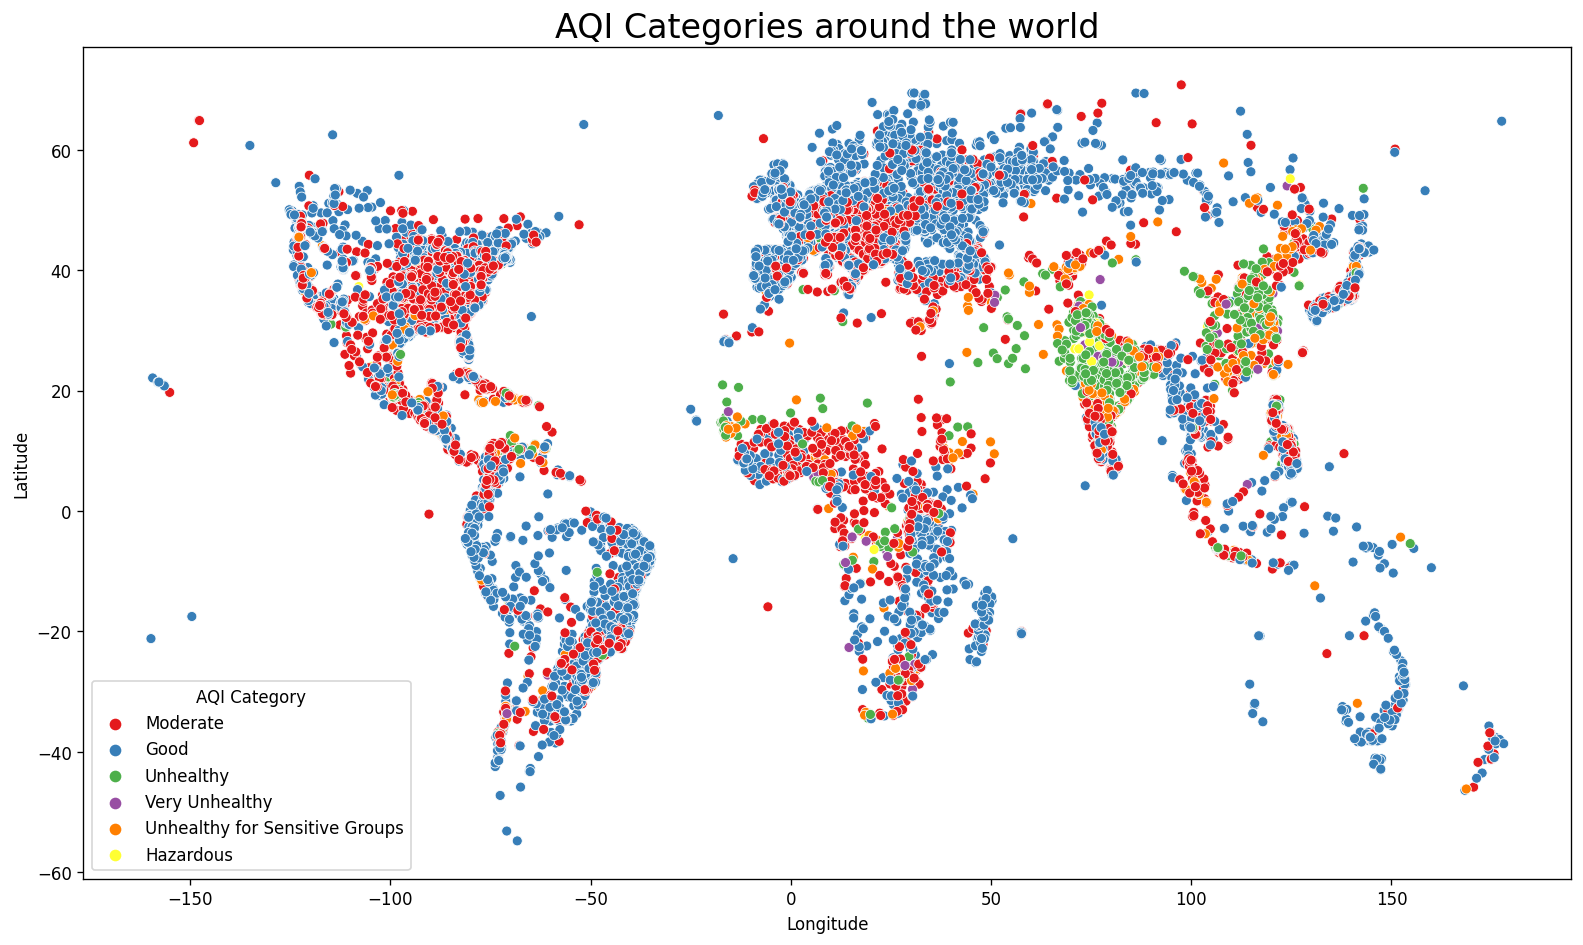

In [33]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#### 3.1.4.Nhận xét dữ liệu các tại các điểm đo đạc

In [34]:
df[numerical_col].describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,63.227902,1.349356,31.794424,3.851156,60.075520
std,43.297779,2.390045,22.975905,5.911545,43.378779
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,20.000000,0.000000,34.000000
50%,52.000000,1.000000,29.000000,2.000000,52.000000
75%,69.000000,1.000000,38.000000,5.000000,69.000000
max,500.000000,133.000000,222.000000,91.000000,500.000000


#### 3.1.5.Vẽ biểu đồ Histogram thể hiện phân phối của các tiêu chí đo khác nhau 

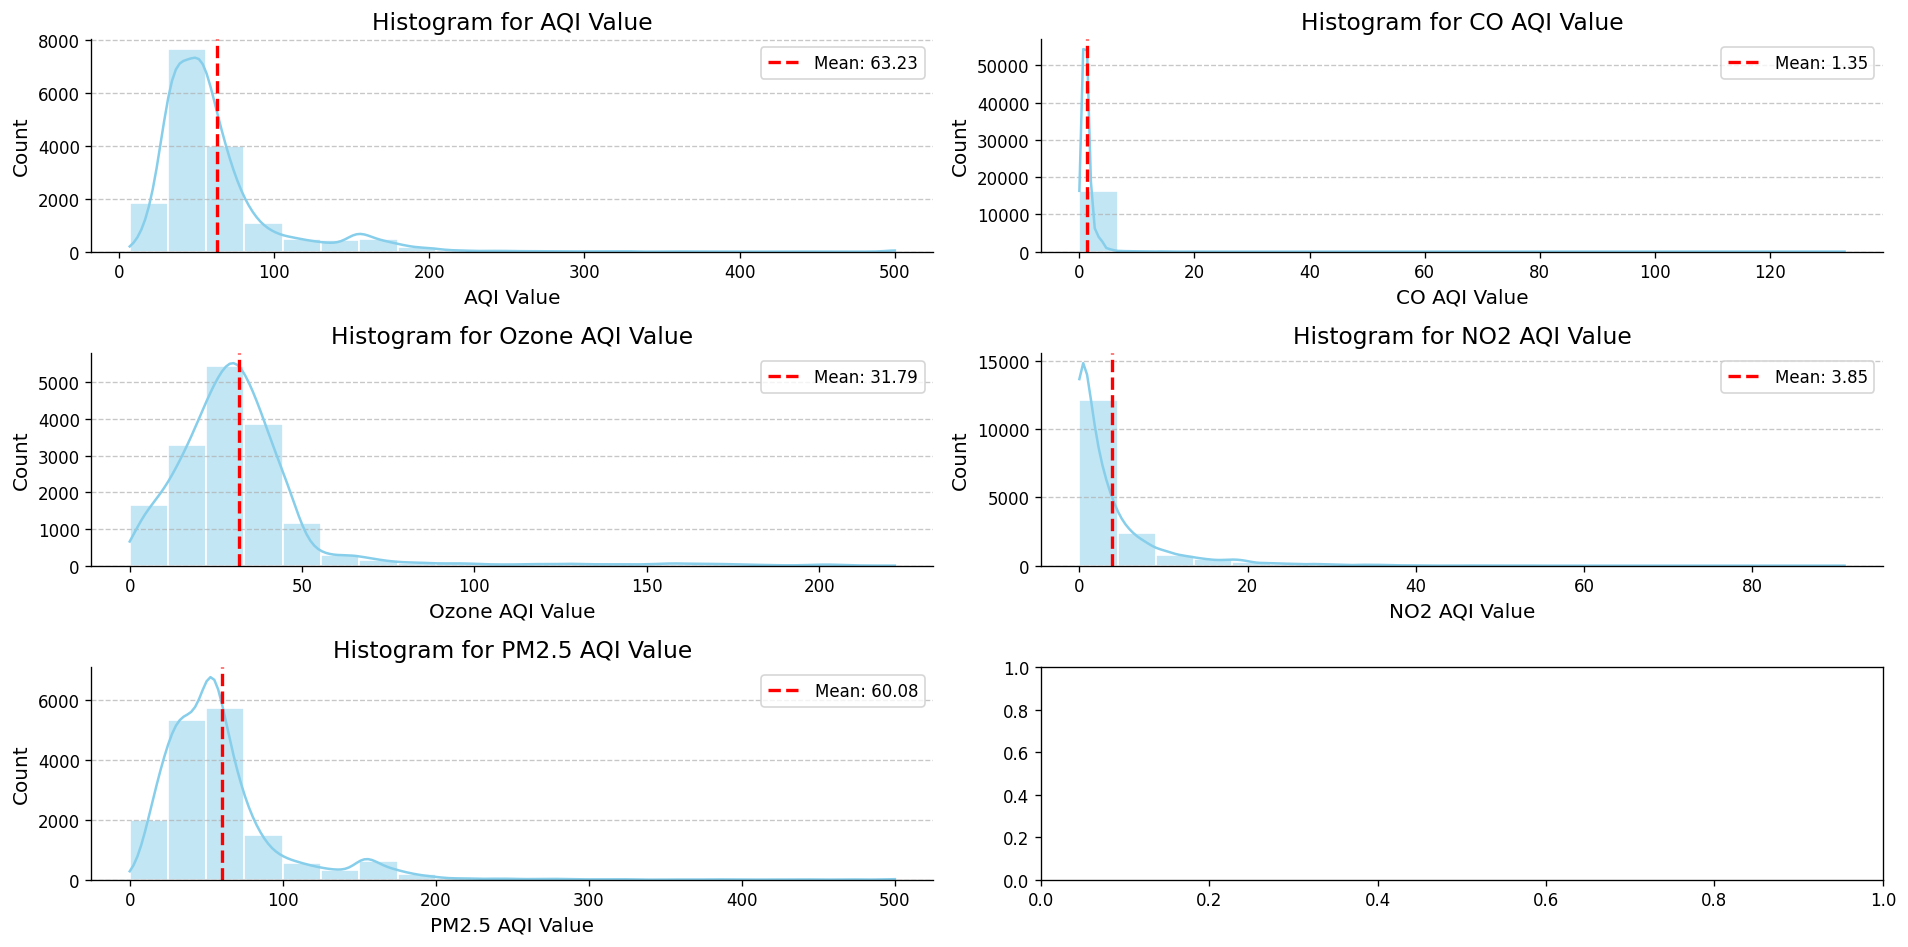

In [35]:
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df[numerical_col] if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Use sns.histplot for better customization and aesthetics
    sns.histplot(df[x], kde=True, ax=axes[row_idx, col_idx], color='skyblue', bins=20, edgecolor='white')
    # Customize the subplot
    axes[row_idx, col_idx].set_xlabel(x, fontsize=12)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=12)
    axes[row_idx, col_idx].set_title(f'Histogram for {x}', fontsize=14)
    # Set grid and style
    axes[row_idx, col_idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    # Add mean line
    mean_val = df[x].mean()
    axes[row_idx, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### 3.1.7. Vẽ biểu đồ bar thể hiện Top 10 quốc gia có giá trị AQI cao nhất

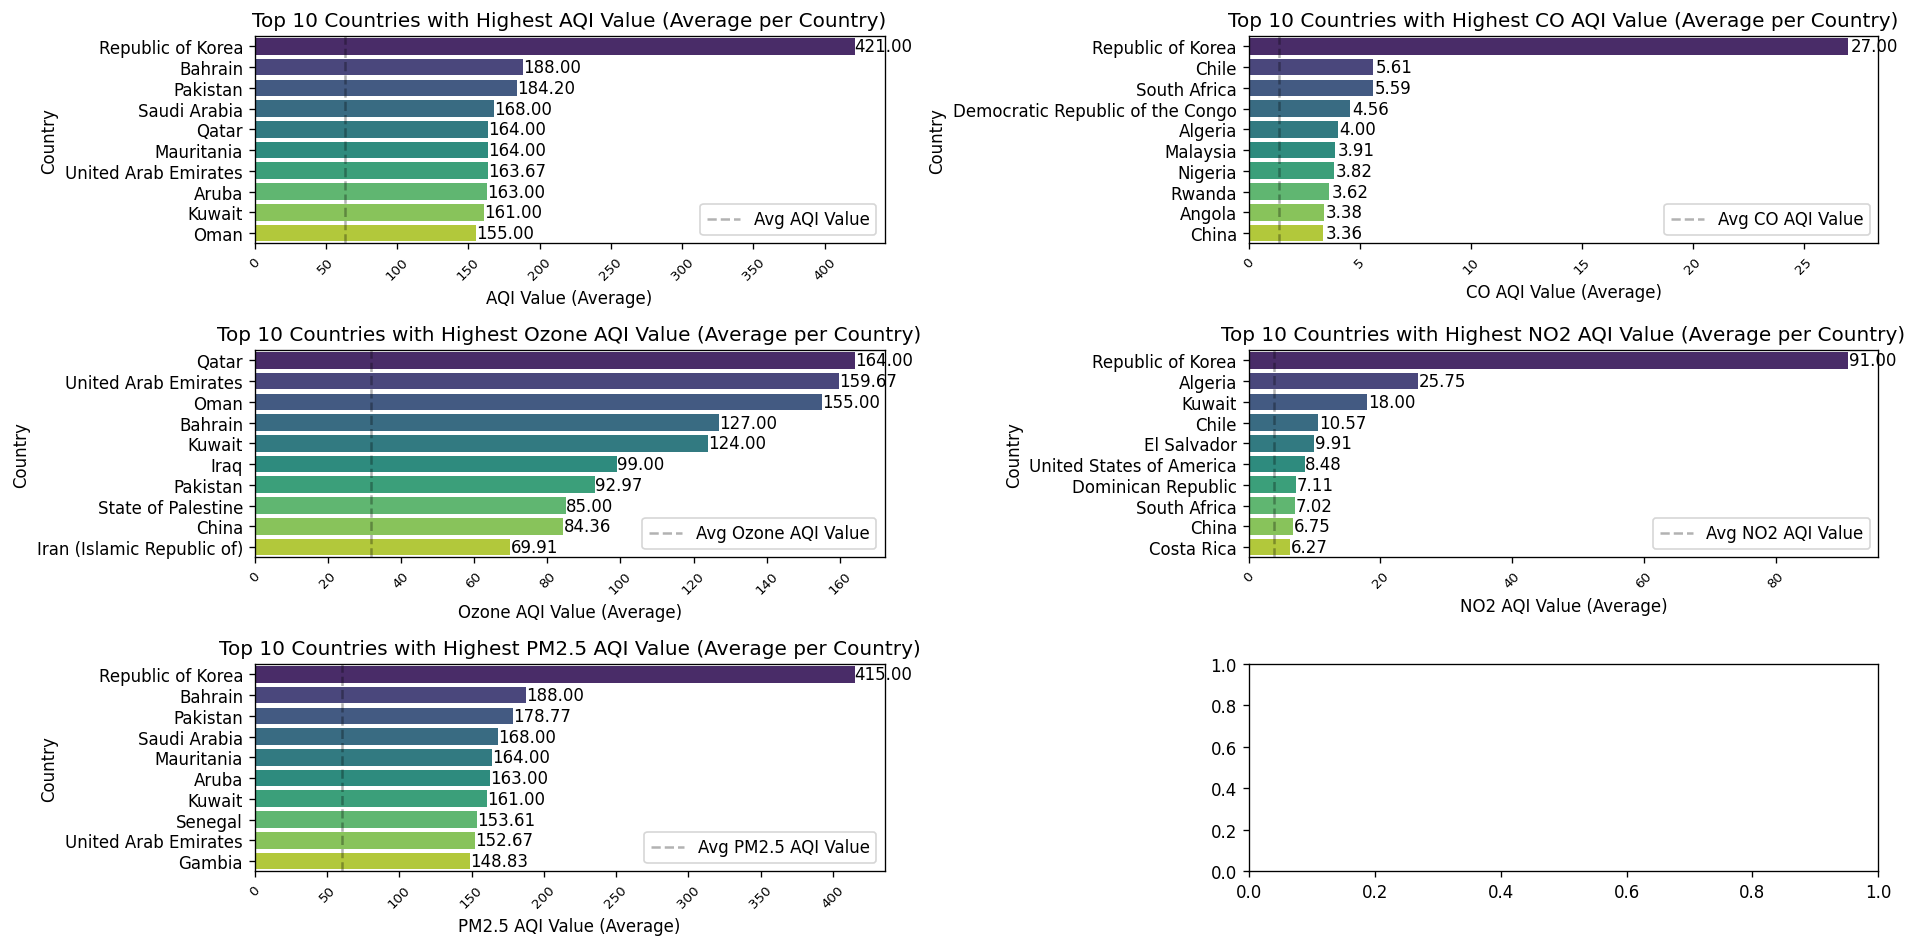

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df.columns if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    df_grouped = df.groupby('Country')[x].mean().reset_index().sort_values(x, ascending=False)[:10]
    # Set a color palette
    sns.set_palette("viridis")
    # Create a color map based on the values of the x column
    color_map = sns.color_palette("viridis", n_colors=len(df_grouped))
    ax = sns.barplot(ax=axes[row_idx, col_idx], data=df_grouped, x=x, y='Country', palette=color_map)
    # Add a horizontal line for the overall mean
    ax.axvline(df[x].mean(), ls='--', color='black', alpha=0.3, label=f'Avg {x}')
    # Customize the plot
    ax.set_title(f'Top 10 Countries with Highest {x} (Average per Country)', fontsize=12)
    ax.set_xlabel(f'{x} (Average)', fontsize=10)
    ax.set_ylabel('Country', fontsize=10)
    ax.legend()
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# 4. Logistic Regression

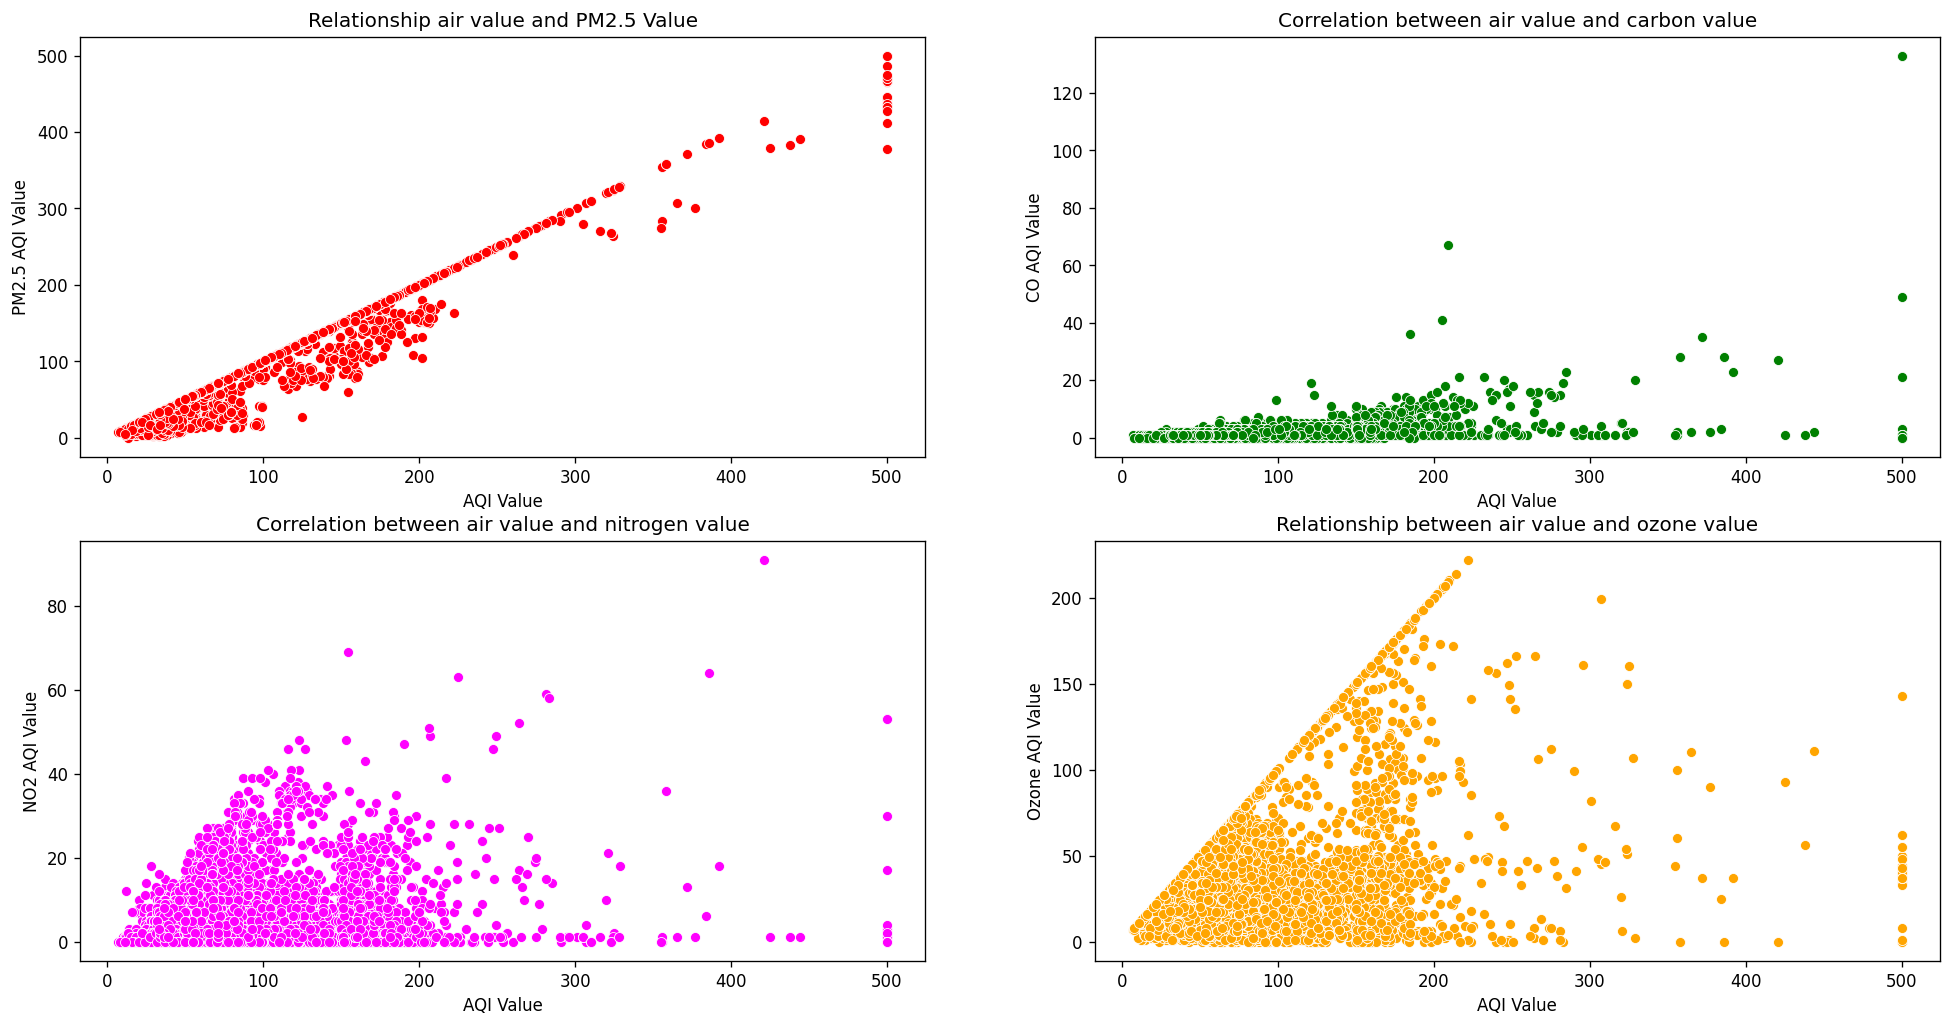

In [37]:
df['CO AQI Category'].replace({'Good':5,'Unhealthy for Sensitive Groups':1,'Moderate':4},inplace = True)
df['Ozone AQI Category'].replace({'Good':5,'Moderate':4,'Unhealthy':3,'Very Unhealthy':2,'Unhealthy for Sensitive Groups':1},inplace = True)
df['NO2 AQI Category'].replace({'Good':5,'Moderate':4},inplace = True)
df['PM2.5 AQI Category'].replace({'Hazardous':0,'Unhealthy for Sensitive Groups':1,'Very Unhealthy':2,'Unhealthy':3,'Moderate':4,'Good':5},inplace = True)
df['AQI Category'].replace({'Hazardous':0, 'Very Unhealthy':1, 'Unhealthy for Sensitive Groups':2, 'Unhealthy':3, 'Moderate':4, 'Good':5}, inplace=True)

df['CO AQI Category']= df['CO AQI Category'].astype(int)
df['Ozone AQI Category']= df['Ozone AQI Category'].astype(int)
df['NO2 AQI Category']= df['NO2 AQI Category'].astype(int)
df['PM2.5 AQI Category']= df['PM2.5 AQI Category'].astype(int)

fig,axes = plt.subplots(nrows=2,ncols = 2,figsize=(20,10));

sns.scatterplot(ax = axes[0,0],x='AQI Value',y='PM2.5 AQI Value',data = df,color = 'red');
sns.scatterplot(ax = axes[0,1],x='AQI Value',y='CO AQI Value',data = df,color = 'green');
sns.scatterplot(ax = axes[1,0],x='AQI Value',y='NO2 AQI Value',data = df,color = 'Fuchsia');
sns.scatterplot(ax = axes[1,1],x='AQI Value',y='Ozone AQI Value',data = df,color='orange');

axes[0,0].title.set_text('Relationship air value and PM2.5 Value')
axes[0,1].title.set_text('Correlation between air value and carbon value')
axes[1,0].title.set_text('Correlation between air value and nitrogen value')
axes[1,1].title.set_text('Relationship between air value and ozone value')

In [53]:
X= df.drop(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Category', 'NO2 AQI Category', 'Ozone AQI Category', 'PM2.5 AQI Category'],axis=1)
y= df['AQI Category']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
print('a = ', model_log.coef_)
print('b = ', model_log.intercept_)
y_pred = model_log.predict(X_test)


a =  [[-0.28347545 -0.30539617 -2.91375149  0.07145625]
 [ 0.56133692 -0.01616536 -0.31658679  0.02281902]
 [-0.430131    0.04450752  0.8584078   0.0170478 ]
 [ 0.3782252   0.08207886  0.77845221  0.01003935]
 [-0.61980935  0.08974193  0.90557388 -0.00521201]
 [ 0.39385368  0.10523322  0.68790439 -0.11615042]]
b =  [-0.54436132 -1.0815545  -1.47836352 -2.97099823  0.75501243  5.32026515]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.802358682391216
              precision    recall  f1-score   support

           0       0.33      0.38      0.35        16
           1       0.00      0.00      0.00        38
           2       0.33      0.10      0.16       264
           3       0.60      0.49      0.54       265
           4       0.78      0.85      0.81      2066
           5       0.88      0.90      0.89      2269

    accuracy                           0.80      4918
   macro avg       0.49      0.45      0.46      4918
weighted avg       0.79      0.80      0.79      4918



#### Decision Tree

In [57]:
from sklearn import tree
score_total = []
for i in range(1, 20):
    model_tree = tree.DecisionTreeClassifier(max_depth=i)
    model_tree.fit(X_train, y_train)
    y_pred=model_tree.predict(X_test)
    score_total.append(accuracy_score(y_test, y_pred))

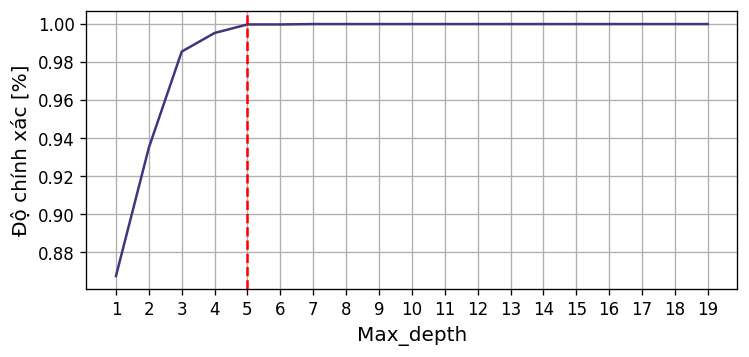

In [58]:
#Vẽ hình thể hiện độ chính xác của max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]', fontsize=12)
plt.xlabel('Max_depth', fontsize=12)
plt.plot(range(1,20), score_total)
plt.xticks(range(1,20))
plt.axvline(x=5, color='r', linestyle='--')
plt.grid('minor')

In [59]:
#Vẽ cây quyết định
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth = 4)
model_tree = model_tree.fit(X_train, y_train)
import graphviz
dot_data = tree.export_graphviz(model_tree, filled=True, rounded=True, special_characters=True)

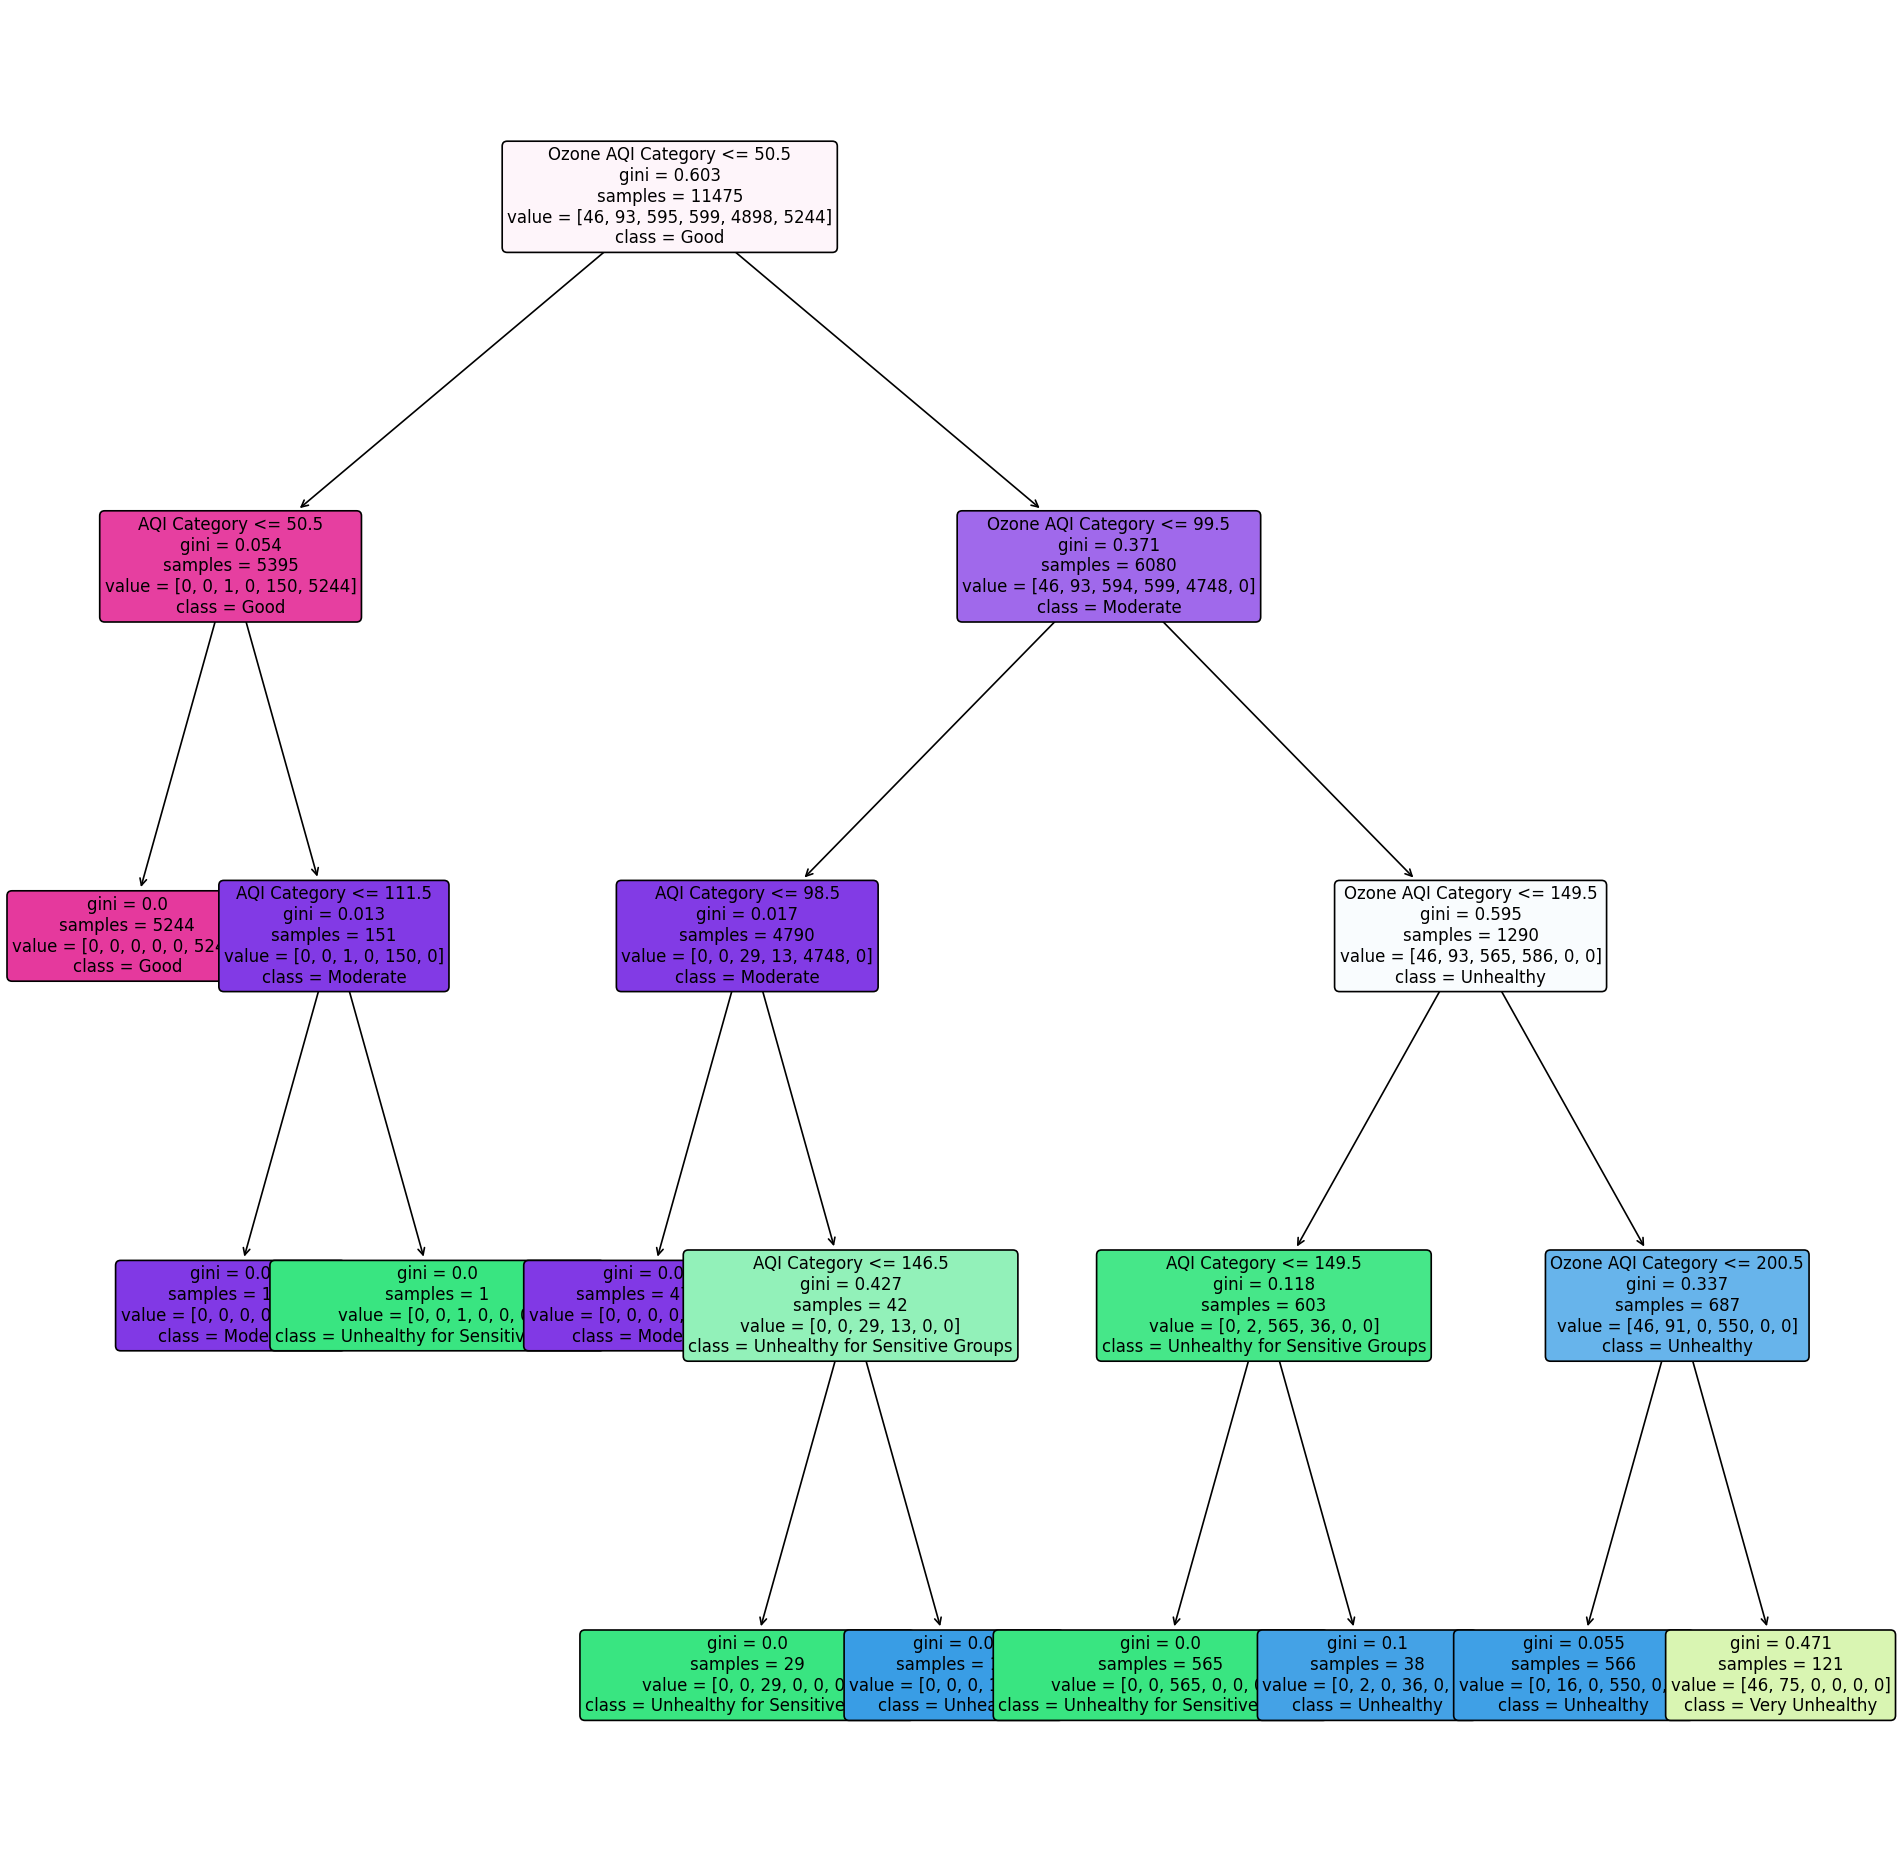

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model_tree' is your trained decision tree model
plt.figure(figsize=(20, 20))
plot_tree(model_tree, 
          feature_names=['CO AQI Value CO', 'AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category'],
          class_names=['Hazardous', 'Very Unhealthy', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Moderate', 'Good'],
          filled=True, rounded=True, fontsize=10)

plt.show()

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9997966653111021
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00       264
           3       1.00      1.00      1.00       265
           4       1.00      1.00      1.00      2066
           5       1.00      1.00      1.00      2269

    accuracy                           1.00      4918
   macro avg       1.00      1.00      1.00      4918
weighted avg       1.00      1.00      1.00      4918



In [70]:
new_location = [[30, 10]]
# Dự đoán AQI Value cho điểm địa lý mới
predicted_AQI = model_tree.predict(new_location)
print("Predicted AQI Value:", predicted_AQI)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 4 features as input.

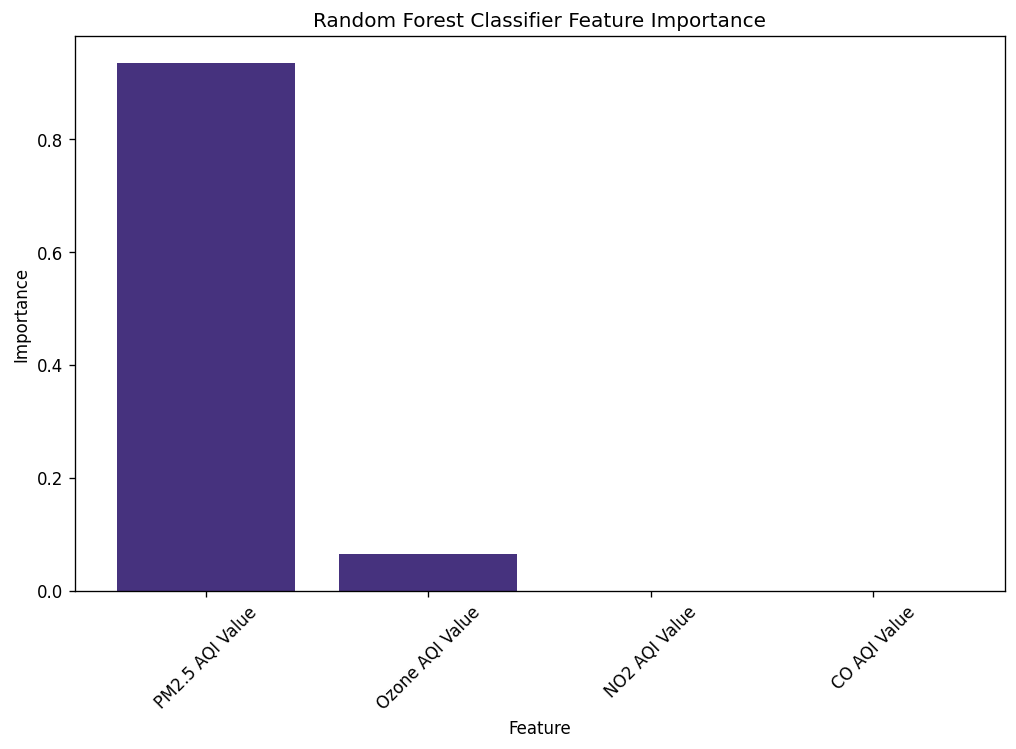

In [62]:
import matplotlib.pyplot as plt
import numpy as np
# Tính mức độ quan trọng của các biến
feature_importances = model_tree.feature_importances_
# Sắp xếp các biến theo mức độ quan trọng giảm dần
sorted_idx = np.argsort(feature_importances)[::-1]
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Classifier Feature Importance")
plt.show()


#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9961366409109395

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9961366409109395
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.84      0.88        38
           2       0.99      0.97      0.98       264
           3       0.95      0.99      0.97       265
           4       1.00      1.00      1.00      2066
           5       1.00      1.00      1.00      2269

    accuracy                           1.00      4918
   macro avg       0.97      0.96      0.96      4918
weighted avg       1.00      1.00      1.00      4918



#### Ensemble Learning

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
LG = LogisticRegression()
bag = BaggingClassifier(LG)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_bag = bag.score(X_test, y_test)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


0.8542090280601871
              precision    recall  f1-score   support

           0       0.15      0.38      0.21        16
           1       0.15      0.08      0.10        38
           2       0.12      0.02      0.03       264
           3       0.78      0.68      0.73       265
           4       0.80      0.93      0.86      2066
           5       0.95      0.92      0.93      2269

    accuracy                           0.85      4918
   macro avg       0.49      0.50      0.48      4918
weighted avg       0.83      0.85      0.83      4918

